In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
statement_dates = pd.read_csv('statement_dates.csv')
spx = pd.read_csv('.\index_data\$SPX.csv',parse_dates=['Date'])

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d%m%Y')
state_date_parse = lambda x: pd.datetime.strptime(x, '%Y%m%d')
spx['Date']=spx['Date'].apply(dateparse)

In [4]:
spx=spx.set_index(['Date'])

In [5]:
spx.drop(columns=['Open Interest','Ticker'], inplace=True)
spx = spx['2000-01-01':]


In [6]:
statement_dates['Statement']=np.ones(len(statement_dates))

statement_dates['Dates']=statement_dates['Dates'].apply(lambda x : str(x))

statement_dates['Dates']=statement_dates['Dates'].apply(state_date_parse)

statement_dates['Statement']=statement_dates['Statement'].apply(lambda x : int(x))

statement_dates=statement_dates.set_index(['Dates'])

In [7]:
spx_statements =spx.join(statement_dates, how='outer')


In [8]:
spx_statements = spx_statements[:'2019-03-01']

In [9]:
spx_statements[['Summary of Econ Projections','Statement']]=spx_statements[['Summary of Econ Projections','Statement']].fillna(0)

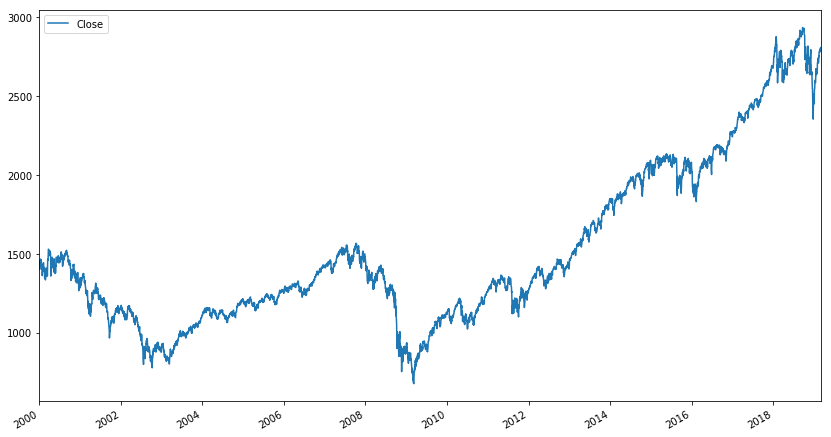

In [10]:
spx_statements.plot(y='Close',figsize=(14,8))

In [11]:
spx_statements['Close'].idxmin() 

Timestamp('2009-03-09 00:00:00')

In [12]:
spx_statements['2010-05-08':'2010-05-12']

,Open,High,Low,Close,Volume,Summary of Econ Projections,Statement
2010-05-09,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2010-05-10,1122.27002,1163.84998,1122.27002,1159.72998,5.925800e+09,0.0,0.0
2010-05-11,1156.39001,1170.47998,1147.70996,1155.79004,4.776800e+09,0.0,0.0
2010-05-12,1155.43005,1172.87000,1155.43005,1171.67004,4.323200e+09,0.0,0.0


In [13]:
spx_statements['close_pct_change']=spx_statements.pct_change()['Close']

In [14]:
spx_statements.head()

,Open,High,Low,Close,Volume,Summary of Econ Projections,Statement,close_pct_change
2000-01-03,1469.25000,1478.00000,1438.35999,1455.17004,1.153700e+09,0.0,0.0,NaN
2000-01-04,1455.21997,1455.21997,1397.43005,1399.42004,1.216500e+09,0.0,0.0,-0.038312
2000-01-05,1399.42004,1413.27002,1377.68005,1402.10999,1.422400e+09,0.0,0.0,0.001922
2000-01-06,1402.10999,1411.90002,1392.02002,1403.44995,1.322900e+09,0.0,0.0,0.000956
2000-01-07,1403.44995,1441.46997,1400.72998,1441.46997,1.472800e+09,0.0,0.0,0.027090


In [15]:
spx_statements['2010-05-08':'2010-05-12']

,Open,High,Low,Close,Volume,Summary of Econ Projections,Statement,close_pct_change
2010-05-09,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.000000
2010-05-10,1122.27002,1163.84998,1122.27002,1159.72998,5.925800e+09,0.0,0.0,0.043974
2010-05-11,1156.39001,1170.47998,1147.70996,1155.79004,4.776800e+09,0.0,0.0,-0.003397
2010-05-12,1155.43005,1172.87000,1155.43005,1171.67004,4.323200e+09,0.0,0.0,0.013740


In [16]:
spx_statements['2010-05-08':'2010-05-12']

,Open,High,Low,Close,Volume,Summary of Econ Projections,Statement,close_pct_change
2010-05-09,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.000000
2010-05-10,1122.27002,1163.84998,1122.27002,1159.72998,5.925800e+09,0.0,0.0,0.043974
2010-05-11,1156.39001,1170.47998,1147.70996,1155.79004,4.776800e+09,0.0,0.0,-0.003397
2010-05-12,1155.43005,1172.87000,1155.43005,1171.67004,4.323200e+09,0.0,0.0,0.013740


This date was a Sunday. Push Effects forward

In [17]:
pd.DataFrame(spx_statements[spx_statements['Statement']==1]['close_pct_change'].describe())

,close_pct_change
count,163.000000
mean,0.003171
std,0.013801
min,-0.049216
25%,-0.003873
50%,0.000911
75%,0.008906
max,0.051360


In [18]:
pd.DataFrame(spx_statements['close_pct_change'].describe())

,close_pct_change
count,4820.000000
mean,0.000209
std,0.012039
min,-0.090350
25%,-0.004800
50%,0.000531
75%,0.005686
max,0.115800


In [19]:
pd.DataFrame(spx_statements[spx_statements['Statement']==0]['close_pct_change'].describe())

,close_pct_change
count,4657.000000
mean,0.000105
std,0.011962
min,-0.090350
25%,-0.004827
50%,0.000524
75%,0.005581
max,0.115800


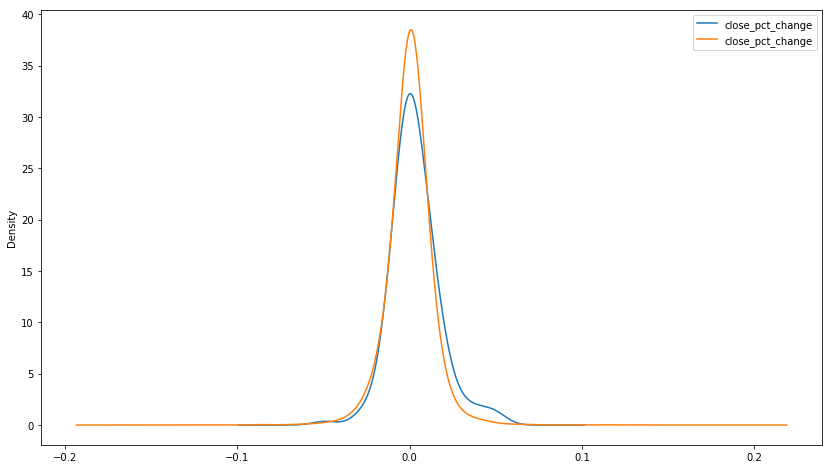

In [20]:
fig, ax = plt.subplots(figsize=(14,8))
spx_statements[spx_statements['Statement']==1]['close_pct_change'].plot.density(ax=ax,bw_method=0.5)
spx_statements['close_pct_change'].plot.density(ax=ax,bw_method=0.5)
ax.legend()

In [21]:
spx_nostate = spx_statements[spx_statements['Statement']==0]['close_pct_change'].dropna()
spx_yesstate=spx_statements[spx_statements['Statement']==1]['close_pct_change']

In [22]:
sm.stats.ttest_ind(spx_yesstate,spx_nostate)

(3.1992343067139366, 0.0013868628027423105, 4818.0)

In [23]:
spx_statements[spx_statements['Statement']==0]['close_pct_change'],

(2000-01-03         NaN
 2000-01-04   -0.038312
 2000-01-05    0.001922
 2000-01-06    0.000956
 2000-01-07    0.027090
 2000-01-10    0.011190
 2000-01-11   -0.013063
 2000-01-12   -0.004532
 2000-01-13    0.012318
 2000-01-14    0.010671
 2000-01-18   -0.006832
 2000-01-19    0.000522
 2000-01-20   -0.007095
 2000-01-21   -0.002912
 2000-01-24   -0.027530
 2000-01-25    0.005957
 2000-01-26   -0.004213
 2000-01-27   -0.003938
 2000-01-28   -0.027464
 2000-01-31    0.025225
 2000-02-01    0.010628
 2000-02-03    0.011248
 2000-02-04   -0.000421
 2000-02-07   -0.000091
 2000-02-08    0.012294
 2000-02-09   -0.020836
 2000-02-10    0.003634
 2000-02-11   -0.020983
 2000-02-14    0.002040
 2000-02-15    0.008713
                 ...   
 2019-01-16    0.002222
 2019-01-17    0.007591
 2019-01-18    0.013183
 2019-01-22   -0.014157
 2019-01-23    0.002203
 2019-01-24    0.001376
 2019-01-25    0.008489
 2019-01-28   -0.007847
 2019-01-29   -0.001456
 2019-01-31    0.008597
 2019-02-01    0

In [24]:
spx_statements[spx_statements['Statement']==1]['close_pct_change']

2000-02-02   -0.000114
2000-03-21    0.025566
2000-05-16    0.009419
2000-06-28    0.002944
2000-08-22   -0.000900
2000-10-03   -0.006872
2000-11-15    0.005127
2000-12-19   -0.012958
2001-01-03    0.050099
2001-01-31   -0.005620
2001-03-20   -0.024077
2001-04-18    0.039143
2001-05-15    0.000416
2001-06-27   -0.004676
2001-08-21   -0.012079
2001-09-17   -0.049216
2001-10-02    0.012306
2001-11-06    0.014526
2001-12-11   -0.002781
2002-01-30    0.011748
2002-03-19    0.004067
2002-05-07   -0.003011
2002-06-26   -0.002684
2002-08-13   -0.021654
2002-09-24   -0.017308
2002-11-06    0.009133
2002-12-10    0.013913
2003-01-29    0.006791
2003-03-18    0.004242
2003-05-06    0.008462
                ...   
2015-06-17    0.001980
2015-07-29    0.007319
2015-09-17   -0.002561
2015-10-28    0.011840
2015-12-16    0.014515
2016-01-27   -0.010863
2016-03-16    0.005600
2016-04-27    0.001649
2016-06-15   -0.001841
2016-07-27   -0.001199
2016-09-21    0.010917
2016-11-02   -0.006526
2016-12-14 

In [31]:
fed_chair = pd.DataFrame({'Date':spx_statements.index})

In [26]:
fed_chair = fed_chair.set_index(['Date'])

In [27]:
fed_chair['fed_chair']='Greenspan'

In [35]:
def chairperson(x):
    if '2006-01-31'>=str(x)>='2000-01-01':
        return 'Greenspan'
    elif '2014-01-31'>=str(x)>='2006-02-01':
        return 'Bernanke'
    elif '2018-02-03'>=str(x)>='2014-02-03':
        return 'Yellen'
    else: 
        return 'Powell'
    
def president(x):
    if '2006-01-31'>=str(x)>='2000-01-01':
        return 'Clinton'
    elif '2014-01-31'>=str(x)>='2006-02-01':
        return 'Bush'
    elif '2018-02-03'>=str(x)>='2014-02-03':
        return 'Obama'
    else: 
        return 'Trump'

In [36]:
fed_chair['fed_chair']=fed_chair['Date'].apply(chairperson)

In [38]:
fed_chair

,Date,fed_chair
0,2000-01-03,Greenspan
1,2000-01-04,Greenspan
2,2000-01-05,Greenspan
3,2000-01-06,Greenspan
4,2000-01-07,Greenspan
5,2000-01-10,Greenspan
6,2000-01-11,Greenspan
7,2000-01-12,Greenspan
8,2000-01-13,Greenspan
9,2000-01-14,Greenspan
